In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import shapely
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [2]:
# read in vector map of berlin
neighbours = geopandas.read_file('data/neighbourhoods.geojson')

In [3]:
# read in listings.cvs to get the locations (and more data) of accommodations
listings2020 = pd.read_csv('data/2020-08-30/unzipped/listings.csv')

In [4]:
# read in reviews.csv to find comments on COVID-19
reviews2020 = pd.read_csv('data/2020-08-30/unzipped/reviews.csv', converters={'date:': pd.Timestamp})
reviews2020.date = reviews2020.date.apply(pd.Timestamp)

In [5]:
# search for all listing ids where covid or coronavirus was mentioned
covid_listing_ids = reviews2020[reviews2020.comments.str.contains(pat='covid|coronavirus', case=False, regex=True, na=False)].listing_id.values

In [6]:
def plot_and_save_listing(listings, neighbours):
    '''
    Description: plots a map of berlin with accomodations marked where review comments contains covid or coronavirus
                 and saves it in SVG format to the local filesystem under the name 'berlin.svg'
    
    Arguments:
        listings (pandas.DataFrame): an Inside Airbnb calendar.csv file.
        neighbours (geopandas.geodataframe.GeoDataFrame): a geojson file containing geographical features 
                                                          representing Berlin
        
    Returns:
        None
    '''
    listings['coords'] = listings[['longitude','latitude']].values.tolist()
    listings['coords'] = listings['coords'].apply(shapely.geometry.Point)
    listings = geopandas.GeoDataFrame(listings, geometry='coords')
    listings.set_crs(inplace=True,epsg=4326)
    fig = plt.figure(figsize=(10,10))
    plt.axis('off')
    ax = fig.add_subplot(111)
    neighbours.plot(ax=ax)
    listings[listings['id'].isin(covid_listing_ids)].plot(ax=ax,cmap='OrRd', marker=',', markersize=6, legend=True)
    fig.savefig('berlin.svg')


<ipython-input-6-5d1e633b684f>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


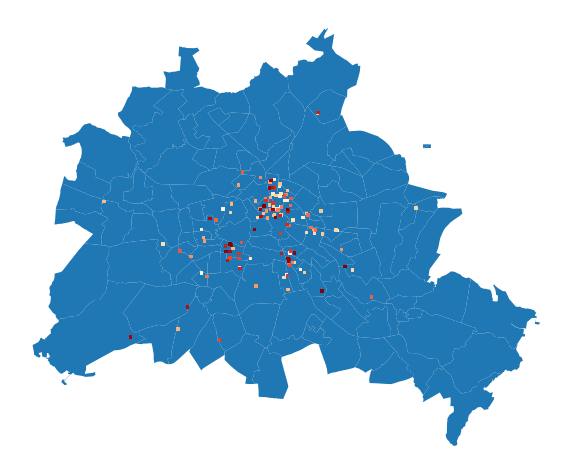

In [7]:
plot_and_save_listing(listings2020,neighbours)

Add some virus icons to complete the teaser image e.g. https://commons.wikimedia.org/wiki/File:Coronavirus_icon.svg